<a href="https://colab.research.google.com/github/M-SAAD-BIN-MAZHAR/BreastCancerDetection_ANN/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)

In [10]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
df['Labels']=load_breast_cancer().target

In [12]:
df.shape

(569, 31)

In [13]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Labels
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [14]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
df['Labels'].value_counts()

,count
Labels,
1,357
0,212


In [21]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Labels
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [25]:
scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(df.drop('Labels',axis=1),df['Labels'],test_size=0.2,random_state=42)

In [26]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [132]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
tensorflow.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization,PReLU

from tensorflow.keras.regularizers import l2


In [133]:
model=Sequential()

model.add(Dense(64,activation='relu',input_dim=30,kernel_regularizer=tensorflow.keras.regularizers.L1(0.001) ))

model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.L1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)

In [135]:
callback=EarlyStopping( monitor="val_loss",
    min_delta=0.01,
    patience=0.01,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
     )

In [140]:
model.compile(optimizer=RMSprop(learning_rate=0.02),loss='binary_crossentropy',metrics=['accuracy'])

In [141]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test) )

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.8590 - loss: 1.0126 - val_accuracy: 0.9737 - val_loss: 0.4376
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9465 - loss: 0.4945 - val_accuracy: 0.9737 - val_loss: 0.3865
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9411 - loss: 0.4309 - val_accuracy: 0.9737 - val_loss: 0.3687
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9183 - loss: 0.4747 - val_accuracy: 0.9211 - val_loss: 0.4258
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9364 - loss: 0.4308 - val_accuracy: 0.9737 - val_loss: 0.3431
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9382 - loss: 0.4327 - val_accuracy: 0.9737 - val_loss: 0.3416
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9327 - loss: 0.4282 - val_accuracy: 0.9386 - val_loss: 0.3912
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9323 - loss: 0.4022 - val_accuracy: 0.9649 - val_los

Text(0, 0.5, 'Accuracy')

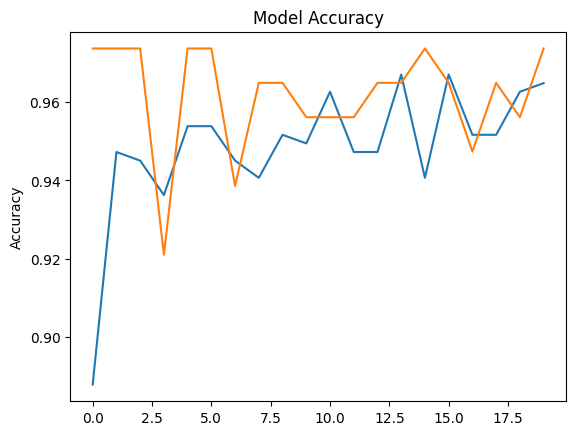

In [142]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

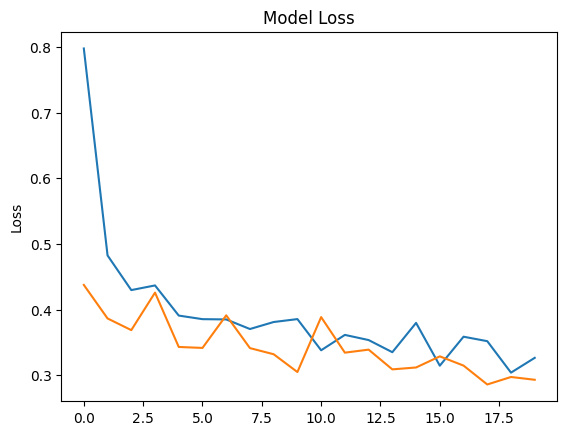

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')


In [144]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy:{accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9707 - loss: 0.3206 
Test accuracy:0.9736841917037964


In [149]:
x_test[0]

array([-0.46649743, -0.13728933, -0.44421138, -0.48646498,  0.28085007,
        0.04160589, -0.11146496, -0.26486866,  0.41524141,  0.13513744,
       -0.02091509, -0.29323907, -0.17460869, -0.2072995 , -0.01181432,
       -0.35108921, -0.1810535 , -0.24238831, -0.33731758, -0.0842133 ,
       -0.2632354 , -0.14784208, -0.33154752, -0.35109337,  0.48001942,
       -0.09649594, -0.03583041, -0.19435087,  0.17275669,  0.20372995])

In [145]:
y_predict=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


In [161]:
y_predict[0].shape

(1,)

In [171]:
y_predict

array([[9.9844623e-01],
       [5.7413550e-03],
       [2.8539378e-02],
       [9.9997687e-01],
       [9.9999928e-01],
       [8.0394151e-04],
       [1.2163977e-03],
       [3.8648613e-02],
       [7.2058928e-01],
       [9.9998772e-01],
       [9.9929845e-01],
       [2.4464378e-02],
       [9.9982870e-01],
       [6.8654403e-02],
       [9.9999905e-01],
       [3.2601219e-02],
       [9.9999285e-01],
       [9.9999857e-01],
       [9.9999988e-01],
       [3.9355508e-03],
       [9.9749124e-01],
       [9.9995673e-01],
       [1.6756281e-03],
       [9.9999869e-01],
       [9.9998772e-01],
       [9.9998641e-01],
       [9.9999595e-01],
       [9.9997234e-01],
       [9.9998093e-01],
       [6.9675948e-03],
       [9.9999106e-01],
       [9.9999964e-01],
       [9.9931765e-01],
       [9.9996006e-01],
       [9.9999774e-01],
       [9.9997962e-01],
       [2.9753815e-02],
       [9.9987745e-01],
       [9.5939180e-03],
       [9.9396527e-01],
       [9.9999666e-01],
       [1.739780

In [153]:
#Y_pred_labels = [np.argmax(i) for i in y_predict]
#print(Y_pred_labels)

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)

In [173]:
Y_pred_labels1 = [np.round(i[0]) for i in y_predict]
print(Y_pred_labels1)

[np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.

In [155]:
Y_pred_labels = [np.round(i[0]) for i in y_predict]
print(Y_pred_labels)

[np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.

In [167]:
input_data = (17.99, 10.38, 122.8, 1001.0, 0.1184,
                          0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                          1.095, 0.9053, 8.589, 153.4, 0.006399,
                          0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                          25.38, 17.33, 184.6, 2019.0, 0.1622,
                          0.6656, 0.7119, 0.2654, 0.4601, 0.118)
input_data=np.asarray(input_data)
input_data=input_data.reshape(1,-1)
input_data=scaler.transform(input_data)
prediction=model.predict(input_data)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.00392657]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [162]:
x_train[0].shape

(30,)

In [170]:
import numpy as np

# Example breast cancer sample (1 row, 30 features)
sample_input = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184,
                          0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                          1.095, 0.9053, 8.589, 153.4, 0.006399,
                          0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                          25.38, 17.33, 184.6, 2019.0, 0.1622,
                          0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
sample_input = scaler.transform(sample_input)
prediction = model.predict(sample_input)
print(prediction)
prediction=prediction.astype(int)
if(prediction[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.00391825]]
The tumor is Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [166]:
sample_input.shape

(1, 30)